In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [2]:
# Loading train and test set

with open('dataset_dict.pickle', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_loaded = loaded_data["X_train"]
X_test_loaded = loaded_data["X_test"]
y_train_loaded = loaded_data["y_train"]
y_test_loaded = loaded_data["y_test"]

In [3]:
X_train_loaded.shape, X_test_loaded.shape

((6204669, 348), (1551168, 348))

In [4]:
y_train_loaded.shape, y_test_loaded.shape

((6204669,), (1551168,))

In [5]:
X_train_loaded.dtypes, X_test_loaded.dtypes

(YEAR             int16
 MONTH            int16
 DAY              int16
 DAY_OF_WEEK      int16
 AIRLINE_AQ        bool
                  ...  
 IATA_CODE_WRG     bool
 IATA_CODE_WYS     bool
 IATA_CODE_XNA     bool
 IATA_CODE_YAK     bool
 IATA_CODE_YUM     bool
 Length: 348, dtype: object,
 YEAR             int16
 MONTH            int16
 DAY              int16
 DAY_OF_WEEK      int16
 AIRLINE_AQ        bool
                  ...  
 IATA_CODE_WRG     bool
 IATA_CODE_WYS     bool
 IATA_CODE_XNA     bool
 IATA_CODE_YAK     bool
 IATA_CODE_YUM     bool
 Length: 348, dtype: object)

In [6]:
y_train_loaded.dtypes,y_test_loaded.dtypes

(dtype('int16'), dtype('int16'))

In [7]:
# Defining class weights for logistic Regression

weights={0:1, 1:99}

In [10]:
list_of_models = {
    'logistic_regression' : LogisticRegression(random_state = 42,max_iter=1000, class_weight=weights),
    'decision_tree' : DecisionTreeClassifier(max_depth = 5, class_weight='balanced',random_state = 42),
    'Random_forest' : RandomForestClassifier(n_estimators = 8, class_weight='balanced', max_depth = 4, random_state = 42)
}


For Model: logistic_regression

For Training Set:

Macro F1 Score: 0.3636316510050366

Confusion Matrix:


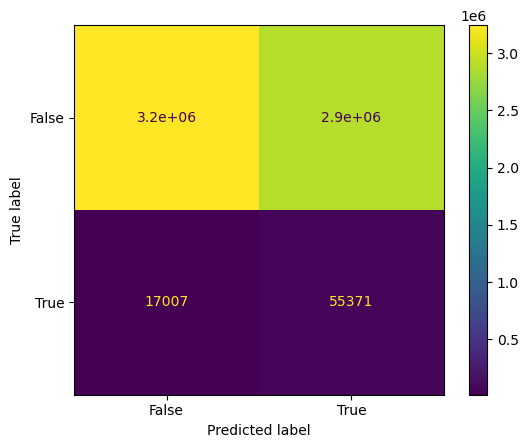


For Model: decision_tree

For Training Set:

Macro F1 Score: 0.4745098846737537

Confusion Matrix:


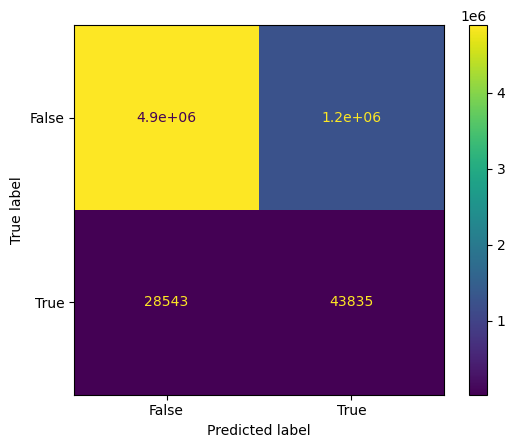


For Model: Random_forest

For Training Set:

Macro F1 Score: 0.440679232006042

Confusion Matrix:


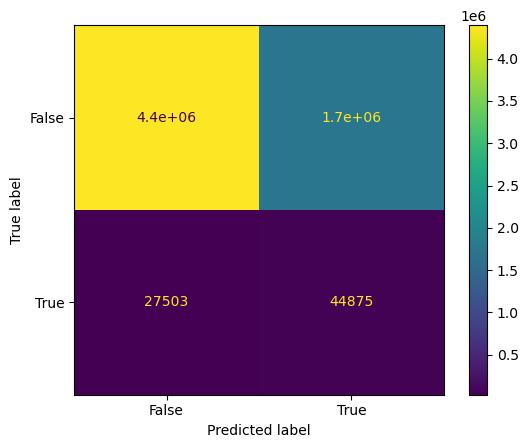

In [11]:
f1_train_scores = [] 
f1_test_scores = [] 
recall_test_scores = []

model_names = list_of_models.keys()

for model in model_names:
    print("\nFor Model:", model)
    
    list_of_models[model].fit(X_train_loaded, y_train_loaded)

    print("\nFor Training Set:")

    y_train_pred = list_of_models[model].predict(X_train_loaded)

    f1_train = f1_score(y_train_loaded, y_train_pred, average='macro')
    print("\nMacro F1 Score:", f1_train)

    print("\nConfusion Matrix:") 
    confusion_matrix = metrics.confusion_matrix(y_train_loaded, y_train_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

The best training model f1 score was Decision Tree.


For Model: logistic_regression
For Test Set:

Macro F1 Score: 0.3639376803223823

Macro recall: 0.646853441481926

Confusion Matrix:


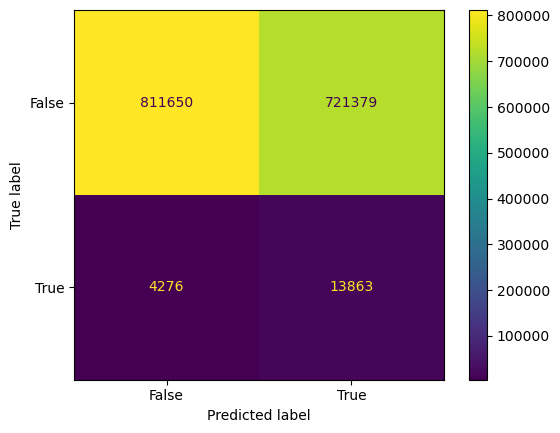


For Model: decision_tree
For Test Set:

Macro F1 Score: 0.47458494443715654

Macro recall: 0.70123369745047

Confusion Matrix:


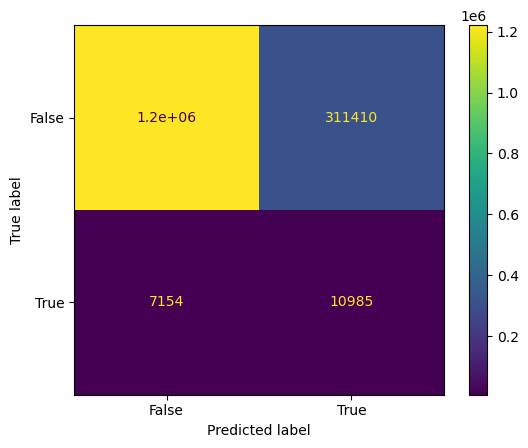


For Model: Random_forest
For Test Set:

Macro F1 Score: 0.4409990442494508

Macro recall: 0.6701292430862726

Confusion Matrix:


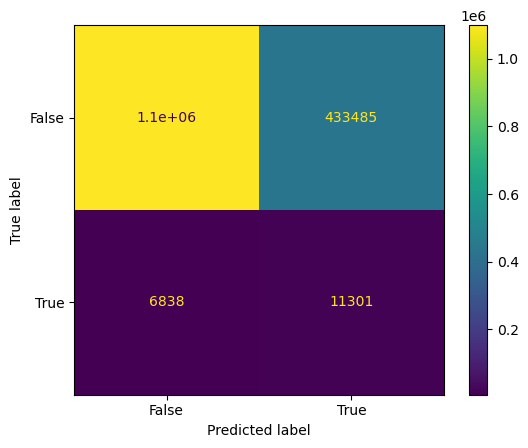

In [15]:
for model in model_names:
    print("\nFor Model:", model)
    
    list_of_models[model].fit(X_train_loaded, y_train_loaded)
    print("For Test Set:")

    y_test_pred = list_of_models[model].predict(X_test_loaded)
    
    f1_test = f1_score(y_test_loaded, y_test_pred, average='macro')
    print("\nMacro F1 Score:", f1_test)

    recall_test_score = recall_score(y_test_loaded, y_test_pred, average='macro')
    print("\nMacro recall:", recall_test_score)
    
    print("\nConfusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test_loaded, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
   

Results show that the Decision tree model is the best.

In [18]:
# Defining a Decisiontree Classifier model

Dt = DecisionTreeClassifier(max_depth = 5, class_weight='balanced',random_state = 42)

In [19]:
# Fitting Dt_pipeline

Dt.fit(X_train_loaded,y_train_loaded)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [20]:
pred = Dt.predict(X_test_loaded)

In [21]:
pred_prob= Dt.predict_proba(X_test_loaded)

[Text(0.43028846153846156, 0.9166666666666666, 'x[0] <= 2011.5\ngini = 0.5\nsamples = 6204669\nvalue = [3102334.5, 3102334.5]'),
 Text(0.16826923076923078, 0.75, 'x[1] <= 11.5\ngini = 0.052\nsamples = 1548629\nvalue = [783198.579, 21602.926]'),
 Text(0.057692307692307696, 0.5833333333333334, 'x[1] <= 9.5\ngini = 0.015\nsamples = 1385923\nvalue = [701079.149, 5186.417]'),
 Text(0.038461538461538464, 0.4166666666666667, 'gini = -0.0\nsamples = 1218708\nvalue = [616546.063, 0.0]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[2] <= 28.5\ngini = 0.109\nsamples = 167215\nvalue = [84533.086, 5186.417]'),
 Text(0.038461538461538464, 0.25, 'x[18] <= 0.5\ngini = 0.091\nsamples = 149310\nvalue = [75491.616, 3771.939]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.11\nsamples = 118327\nvalue = [59817.78, 3729.077]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.005\nsamples = 30983\nvalue = [15673.837, 42.863]'),
 Text(0.11538461538461539, 0.25, 'x[7] <= 0.5\ngin

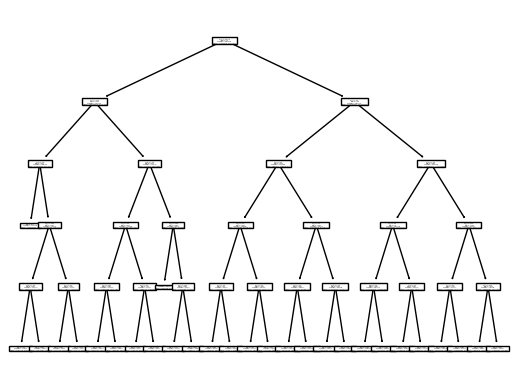

In [22]:
# Visualizing the decision tree

import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(Dt)

In [23]:
# Printing Clasification report of Dt model

class_report = classification_report(y_test_loaded, pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88   1533029
           1       0.03      0.61      0.06     18139

    accuracy                           0.79   1551168
   macro avg       0.51      0.70      0.47   1551168
weighted avg       0.98      0.79      0.88   1551168



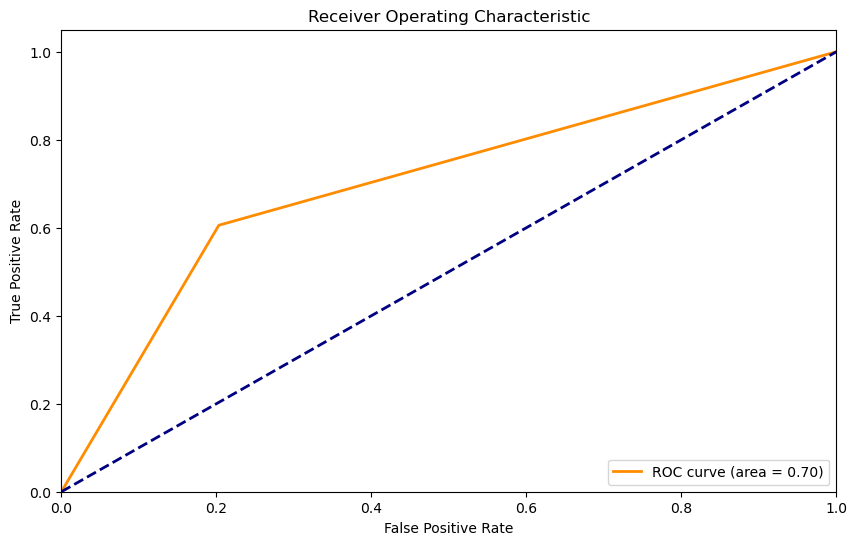

In [24]:
# ROC curve
y_score = Dt.predict_proba(X_test_loaded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_loaded, pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

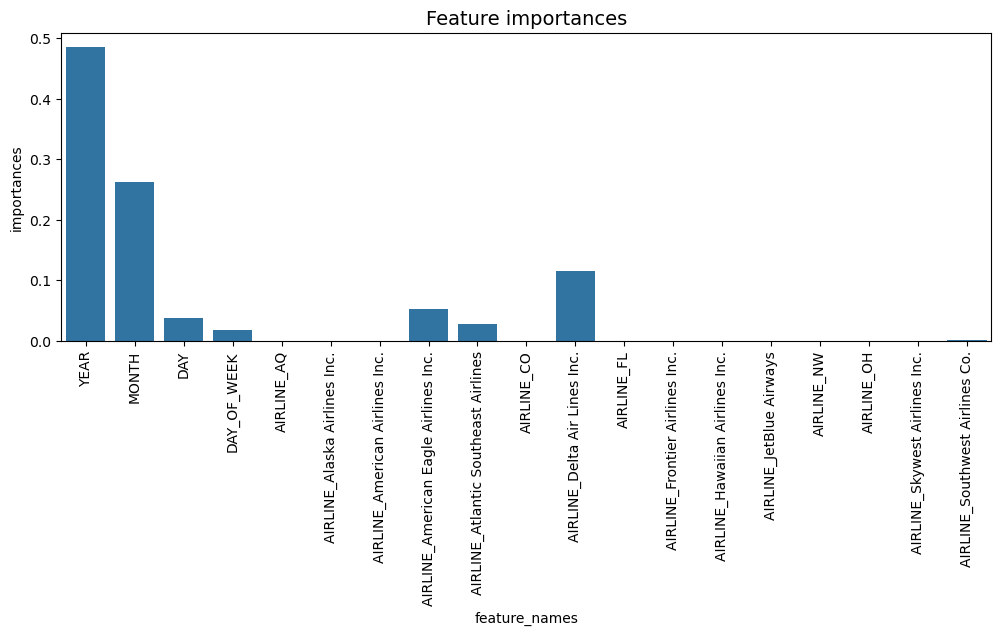

In [25]:
# Feature Importance
importances_df = pd.DataFrame({"feature_names" : Dt.feature_names_in_, 
                               "importances" : Dt.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(12, 4))
g = sns.barplot(x=importances_df["feature_names"][:19], 
                y=importances_df["importances"][:19])
plt.xticks(rotation=90)
g.set_title("Feature importances", fontsize=14);

Although the current state of the model is not bad, the inability of the model to correctly classify data leading to the highest false negatives(7154) amongst the other two models proves that the Decision model is not solving the issue of predicting flight cancellations in advance accurately. The model must therefore be improved.

In [26]:
# improving the model by creating an array of class probabilities called y_scores

y_scores = Dt.predict_proba(X_test_loaded)[:, 1]

In [27]:
# Generating a precision recall curve

p, r, thresholds = precision_recall_curve(y_test_loaded, y_scores)

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

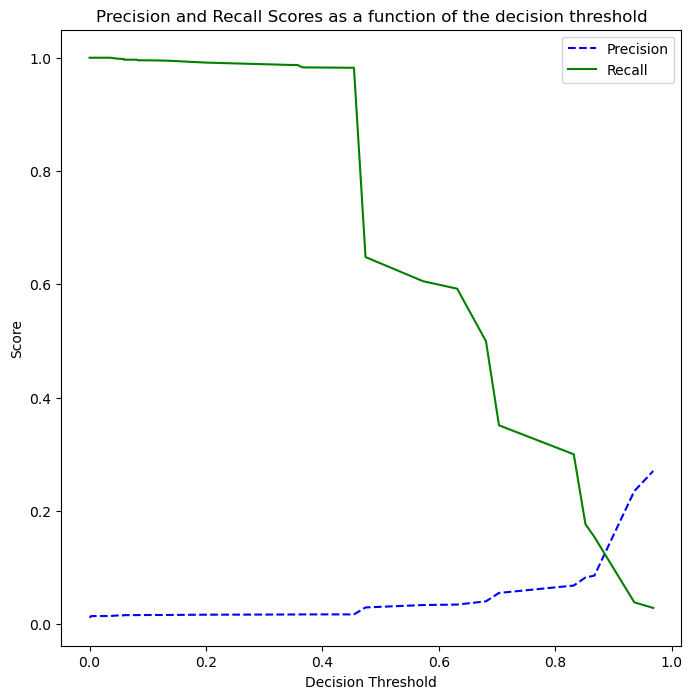

In [29]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [58]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    y_pred_adj = adjusted_classes(y_scores, t)
    #print(pd.DataFrame(confusion_matrix(y_test_loaded, y_pred_adj),
     #        columns=['pred_neg', 'pred_pos'], 
     #                  index=['neg', 'pos']))
    print("\nConfusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test_loaded,  y_pred_adj)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()


Confusion Matrix:


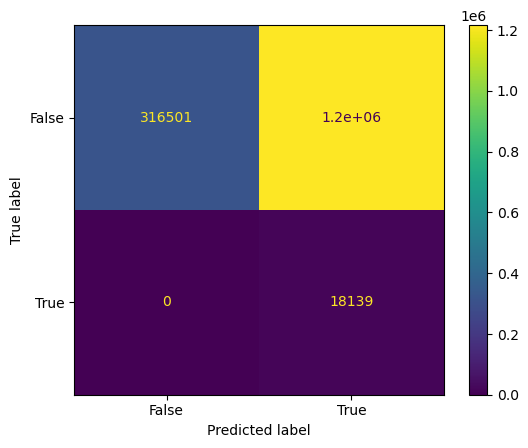

In [59]:
# new confusion matrix after reducing threshold to 0.01

precision_recall_threshold(p, r, thresholds, 0.01)

** Summary**

Three classification machine learning models were built to predict flight cancellation.
The first model created was logistic Regression Model.
The second model was Decision Tree Classifier.
The third model created was a Random Forest Classifier Model. 
The parameters were adjusted for each model because the data was imbalan

Confusion matrices were generated for training set of each model and the Macro f1 score was calculated for these training sets as well.
The best performing model from the f1 train score was the Decision Tree model.The least performing model on the training set was the logistic Regression model.

Confusion matrices were then generated to assess the performance of these three models on the test sets. F1 scores were also calculated for each model and the results were no different from what was generated for the train set.

Decision Tree also has the highest recall test scores of the three model, for this reason it is the selected model for this project.
The classification report showed that precision and f1 scores of the less dominant class was very low.

An ROC curve and AUC score was generated and it showed an AUC score of 0.70 which indicates that Dt model can rank a randomly positive instance higher than a randomly negative instance.

The most important features of the Decision Tree model were Year, Month and Delta Airlines.

Although the current state of the model is not bad, the inability of the model to correctly classify data leading to the highest false negatives(7154) amongst all three models proves that the Decision model is not solving the issue of predicting flight cancellations in advance accurately. The model must therefore be improved.

To improve the model and reduce false negatives, the decision threshold was reduced from the default 0.5 to 0.01.The trade off for this is the increase in false positive values from 311410 to 1.2e+06.
ced.
